In [1]:
import tensorflow as tf

import os, warnings

urli = "https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip"

In [ ]:
import tensorflow.keras.utils as utils

tenori(urli)

In [3]:
rooter = "/tmp/datasets/rockpaperscissors/rps-cv-images"

os.listdir(rooter)

['paper', 'scissors', 'README_rpc-cv-images.txt', 'rock']

In [4]:
os.remove(os.path.join(rooter, os.listdir(rooter)[2]))

os.listdir(rooter)

['paper', 'scissors', 'rock']

In [ ]:
image = (150, 150); split = 0.3; random = 128

unseet = 10; subset = "both"

orifile = utils.image_dataset_from_directory(
  rooter,
  seed = unseet,
  subset = subset,
  image_size = image,
  batch_size = random,
  validation_split = split
)

train, testi = orifile

In [6]:
labeler = train.class_names

labeler

['paper', 'rock', 'scissors']

In [7]:
outlen = len(labeler)

outlen

3

In [8]:
relater = lambda i, l : (tf.cast(tf.math.divide(i, 255.0), tf.float32), l)

train = train.map(relater).cache().prefetch(1)

testi = testi.map(relater)

In [9]:
import tensorflow.keras.layers as layers

from tensorflow.keras.models import Model

input_shape = (150, 150, 3)

class Helper(Model):
  def __init__(self):
    super(Helper, self).__init__()
    self.flip_left_right = layers.RandomFlip()
    self.random_rotation = layers.RandomRotation(factor=0.4)
    self.random_translation = layers.RandomTranslation(height_factor=0.2, width_factor=0.2)
    self.random_size = layers.RandomZoom(height_factor=0.2)

  def call(self, i):
    x = self.flip_left_right(i)
    x = self.random_translation(x)
    x = self.random_translation(x)
    x = self.random_size(x)
    return x

imager = Helper()

train = train.map(lambda i, l : (imager(i), l))

testi = testi.map(lambda i, l : (imager(i), l))

In [10]:
class Hantu(Model):
  def __init__(self, outlen):
    super(Hantu, self).__init__()
    self.imasatu = layers.Conv2D(16, 3, activation="relu", padding="same")
    self.imanida = layers.Conv2D(32, 3, activation="relu", padding="same")
    self.imatiga = layers.Conv2D(64, 3, activation="relu", padding="same")
    self.pooling = layers.MaxPool2D((2, 2))

    self.flatten = layers.Flatten()
    self.dropout = layers.Dropout(0.2)
    self.denseri = layers.Dense(128, activation="relu")
    self.classes = layers.Dense(outlen, activation=tf.nn.softmax)

  def call(self, i):
    x = self.pooling(self.imasatu(i))
    x = self.pooling(self.imanida(x))
    x = self.pooling(self.imatiga(x))
    x = self.flatten(x)
    x = self.dropout(x)
    x = self.denseri(x)
    j = self.classes(x)
    return j

model = Hantu(outlen)

In [11]:
from tensorflow.keras.callbacks import Callback

class Matrit(Callback):
  def on_epoch_end(self, epoch, logs=None):
    if logs.get("accuracy") >= 0.90 and logs.get("val_accuracy") >= 0.90:
      self.model.stop_training = True

callbacks = Matrit()

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

epochs = 18

plot = model.fit(train, validation_data=testi, epochs=epochs, callbacks=[callbacks])

In [13]:
model.evaluate(train, verbose=0)

[0.28754013776779175, 0.9073107242584229]

In [14]:
model.evaluate(testi, verbose=0)

[0.2626657485961914, 0.9070122241973877]

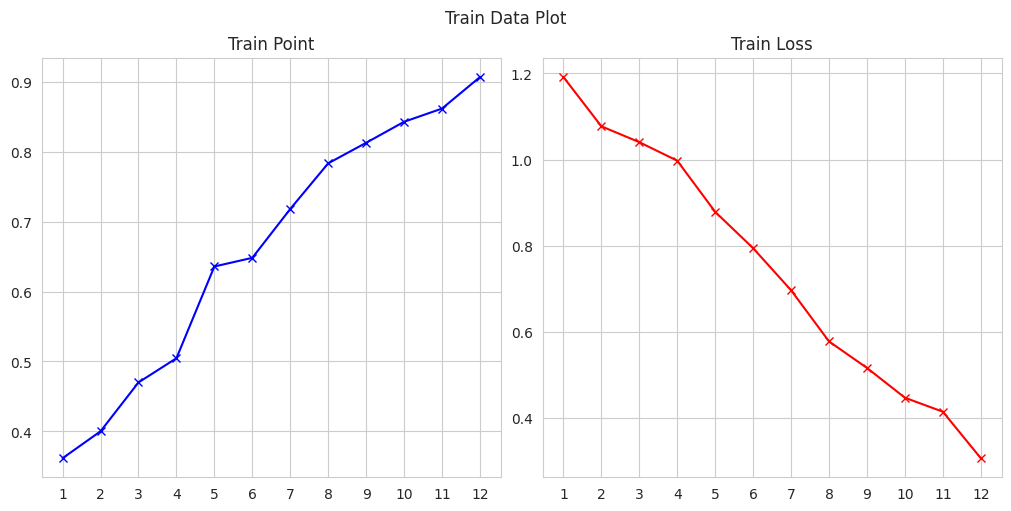

In [15]:
plot = Helplot(plot)

plot.trainplot

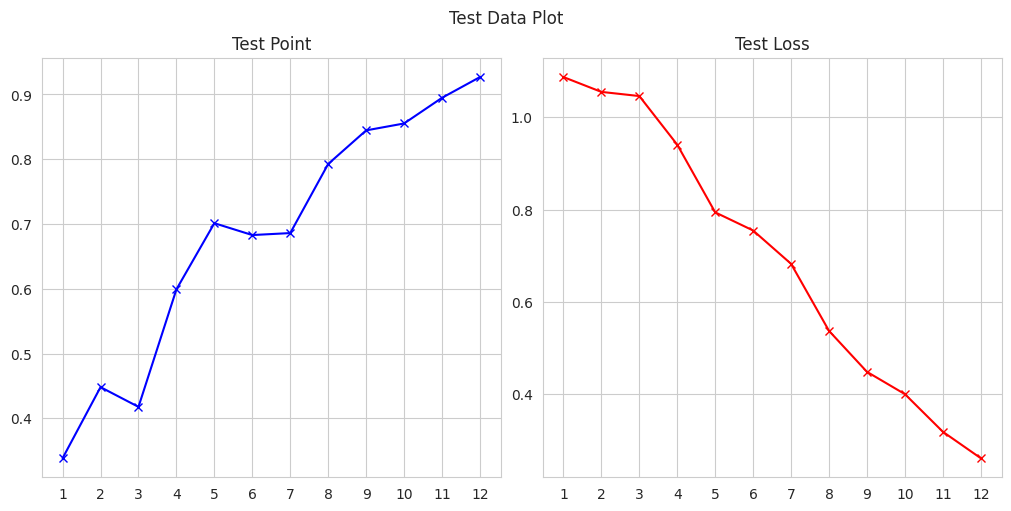

In [16]:
plot.testiplot

In [ ]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

!apt-get install tensorflow-model-server

In [18]:
import os

molder = "/content/model"

os.mkdir(molder)

serial = "1"

molpat = os.path.join(molder, serial)

tf.saved_model.save(model, molpat)

In [19]:
os.environ["ModelFolder"] = molder

In [20]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=inter_model \
  --model_base_path="${ModelFolder}"

In [ ]:
!tail server.log

In [22]:
import json, requests

test_img, test_label = next(iter(testi))

test_img = test_img.numpy().tolist()

url = "http://127.0.0.1:8501/v1/models/inter_model:predict"

In [23]:
image = json.dumps({"signature_name":"serving_default", "instances":test_img})

content = {"content-type":"application/json"}

response = requests.post(url, data=image, headers=content)

In [24]:
loader = json.loads(response.text)

result = loader["predictions"]

tf.math.argmax(result, axis=1).numpy()

array([0, 1, 0, 0, 2, 1, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       0, 2, 2, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 0, 0,
       0, 0, 1, 2, 1, 2, 1, 2, 2, 1, 0, 1, 2, 0, 2, 2, 0, 2, 0, 0, 1, 2,
       1, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 0, 2, 2,
       0, 2, 1, 1, 1, 0, 2, 1, 1, 0, 2, 1, 1, 2, 1, 0, 2, 2])

In [25]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

loss_i = loss_fn(test_label, result)

loss_i.numpy()

0.256451

In [26]:
model.save('/tmp/modelapi', save_format='tf')

In [ ]:
model_api = tf.keras.models.load_model('/tmp/modelapi')

In [28]:
model_api.evaluate(train)

[0.259725958108902, 0.9229764938354492]

In [29]:
model_api.evaluate(testi)

[0.2574523091316223, 0.9222561120986938]